In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import pandas as pd 

import apriori
import preprocess

DATA_FILE = '../data/diagnosis.data'
OUTPUT_FILE = '../data/diagnosis.csv'
MIN_SUPPORT = 0.2
MIN_CONFIDENT = 0.6
MIN_LIFT = 3.0

# prepocess the original data file
preprocess.preprocess(DATA_FILE, OUTPUT_FILE)

# get the data_set from .csv file
data_set = apriori.load_dataset(OUTPUT_FILE)

# get frequent items and their support value
f, f_support = apriori.apriori(data_set, MIN_SUPPORT)

# generate the rules
rules = apriori.gen_rules(f, f_support, MIN_CONFIDENT, MIN_LIFT)

# discard duplicate rules
# if rule A's lhs and rhs is the subset of rule B's
# and rule A's lift is less than B's
discard_rules = []
for i in range(len(rules)):
    rule_a = rules[i]
    for j in range(len(rules)):
        if i == j or i in discard_rules or j in discard_rules:
            continue
        rule_b = rules[j]
        if(rule_a['lhs'].issubset(rule_b['lhs']) and rule_a['rhs'].issubset(rule_b['rhs']) and rule_a['lift'] <= rule_b['lift']):
            # print rule_a, '\n', rule_b, '\n\n'
            discard_rules.append(i)
# remove the duplicate rules and stroe the rest rules into 'strong_rules'
strong_rules = []
for i in range(len(rules)):
    if i not in discard_rules:
        strong_rules.append(rules[i])

In [3]:
df_strong_rules = pd.DataFrame(strong_rules)

In [4]:
df_strong_rules

,confident,lhs,lift,rhs,support
0,0.6125,(4),1.500000,"(5, 7)",0.408333
1,1.0000,"(5, 6, 7)",1.500000,(4),0.241667
2,1.0000,"(4, 6, 7)",2.033898,(5),0.241667
3,1.0000,"(4, 5, 6)",2.033898,(7),0.241667
4,1.0000,"(6, 7)",2.448980,"(4, 5)",0.241667
5,1.0000,"(5, 6)",2.033898,"(4, 7)",0.241667
6,1.0000,"(8, 3, 4, 6)",2.000000,(1),0.250000
7,1.0000,"(8, 1, 4, 6)",1.714286,(3),0.250000
8,1.0000,"(8, 1, 3, 6)",1.500000,(4),0.250000
9,0.7500,"(8, 1, 3, 4)",1.800000,(6),0.250000


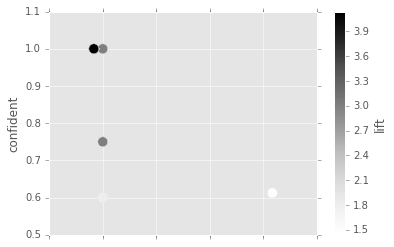

In [5]:
plot = df_strong_rules.plot.scatter(x = 'support', y = 'confident', c = 'lift', s = 100)
fig = plot.get_figure()
fig.savefig('../image/rules_scatter.jpg')